In [ ]:
# 1. LOAD AND INSPECT DATA
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
housing = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/PHY391 MLPR/Data/housing.csv")

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#LET'S NOT DEAL WITH CATEGORICAL LABELS FOR NOW
housing = housing.drop("ocean_proximity",axis="columns")  # or axis =1
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

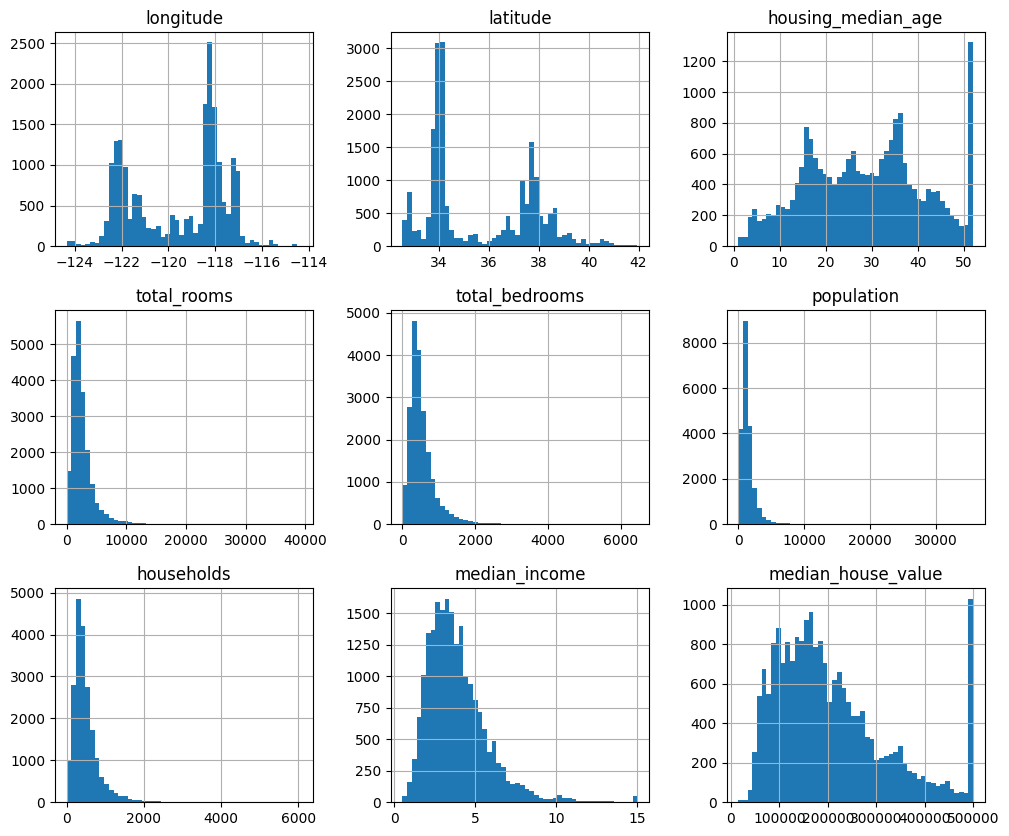

In [ ]:
housing.hist(bins=50,figsize=(12,10))

In [ ]:
# 2. SEPARATE TRAINING DATA TO CREATE SEPARATE TEST AND TRAINING DATA. CONTINUE ON INSPECTING DATA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
housingtr = train_set.copy()

In [ ]:
housingtr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16349 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


<Axes: xlabel='longitude', ylabel='latitude'>

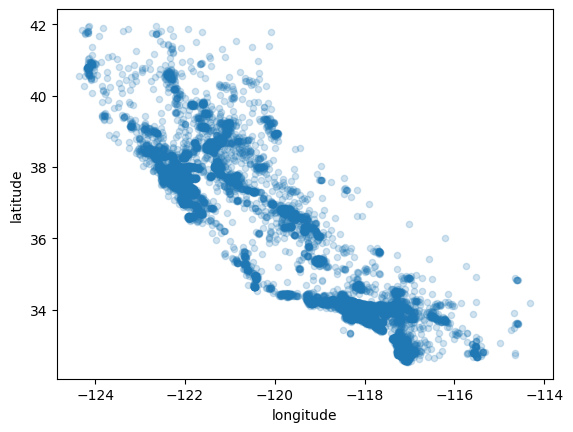

In [ ]:
housingtr.plot(kind="scatter", x="longitude",y="latitude", alpha=0.2)  #, figsize=(8,6)

<Axes: xlabel='longitude', ylabel='latitude'>

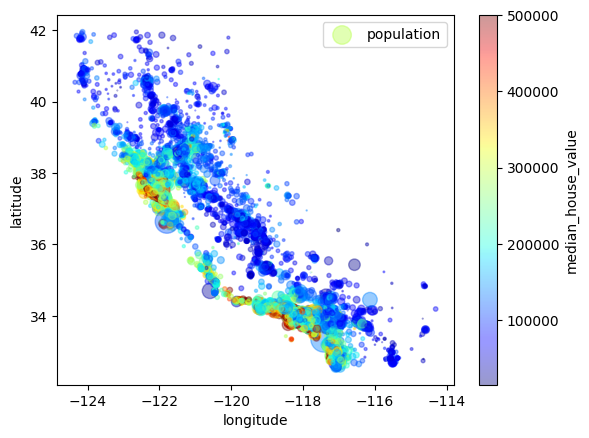

In [ ]:
housingtr.plot(kind="scatter", x="longitude",y="latitude", alpha=0.4,
              s=housingtr["population"]/100,label="population",c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

In [ ]:
corr_matrix = housingtr.corr()

In [ ]:
corr_matrix["median_house_value"]

,median_house_value
longitude,-0.043603
latitude,-0.146324
housing_median_age,0.104714
total_rooms,0.134060
total_bedrooms,0.049993
population,-0.025820
households,0.065798
median_income,0.687013
median_house_value,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

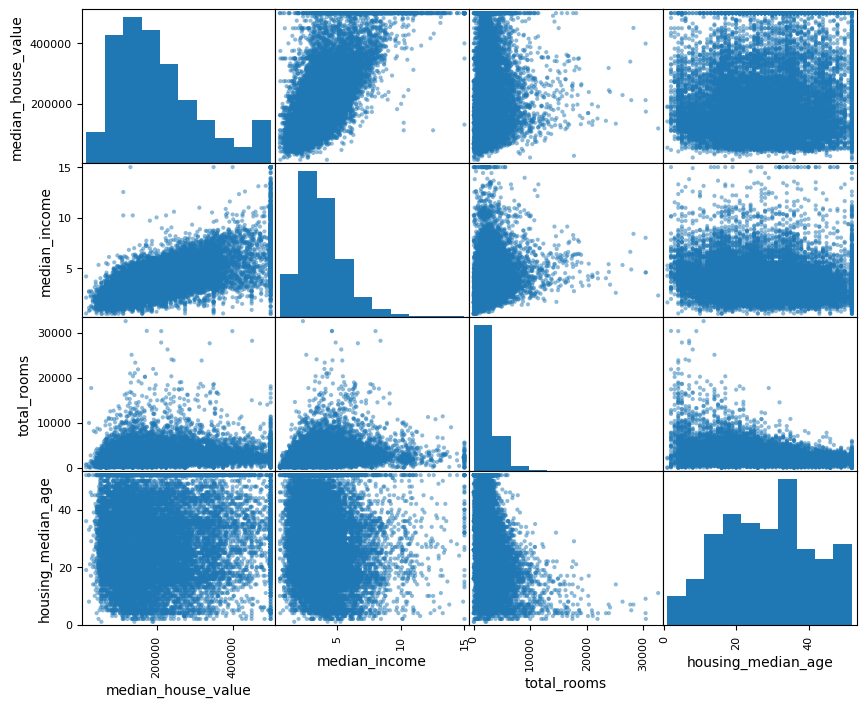

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housingtr[attributes],figsize=(10,8))

In [ ]:
# 3. TRANSFORM/MODIFY/CLEAN DATA IN PREPARATION FOR ML
housingtr["rooms_per_household"]=housingtr["total_rooms"]/housingtr["households"]
housingtr["bedrooms_ratio"]=housingtr["total_bedrooms"]/housingtr["total_rooms"]
housingtr["population_per_household"]=housingtr["population"]/housingtr["households"]

housingtr = housingtr.drop("total_rooms",axis="columns")
housingtr = housingtr.drop("total_bedrooms",axis="columns")
housingtr = housingtr.drop("population",axis="columns")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'bedrooms_ratio'}>,
        <Axes: title={'center': 'population_per_household'}>]],
      dtype=object)

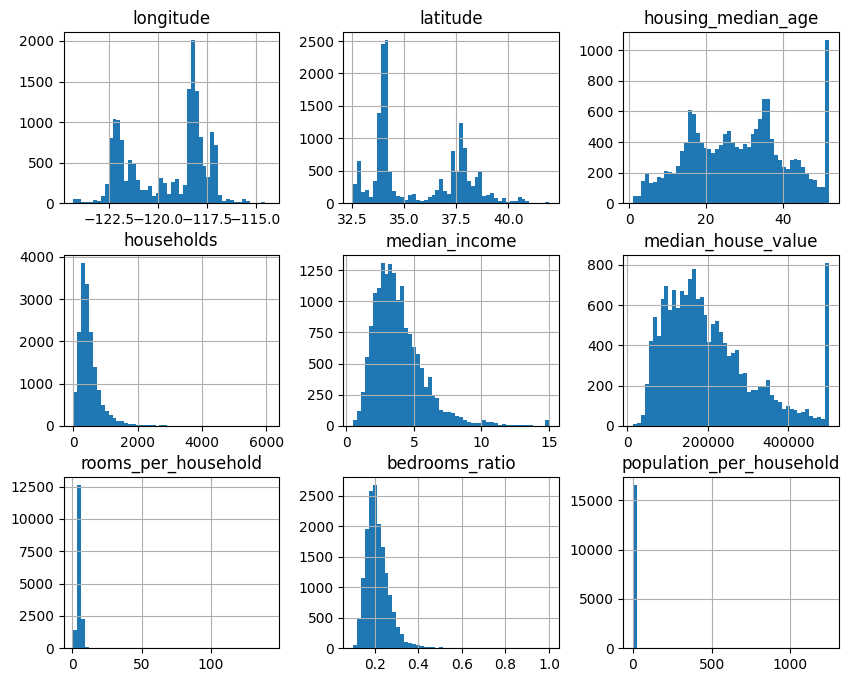

In [ ]:
housingtr.hist(bins=50,figsize=(10,8))

In [ ]:
import numpy as np
housingtr["rooms_per_household"]=housingtr["rooms_per_household"].apply(np.log)
housingtr["bedrooms_ratio"]=housingtr["bedrooms_ratio"].apply(np.log)
housingtr["population_per_household"]=housingtr["population_per_household"].apply(np.log)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'rooms_per_household'}>,
        <Axes: title={'center': 'bedrooms_ratio'}>,
        <Axes: title={'center': 'population_per_household'}>]],
      dtype=object)

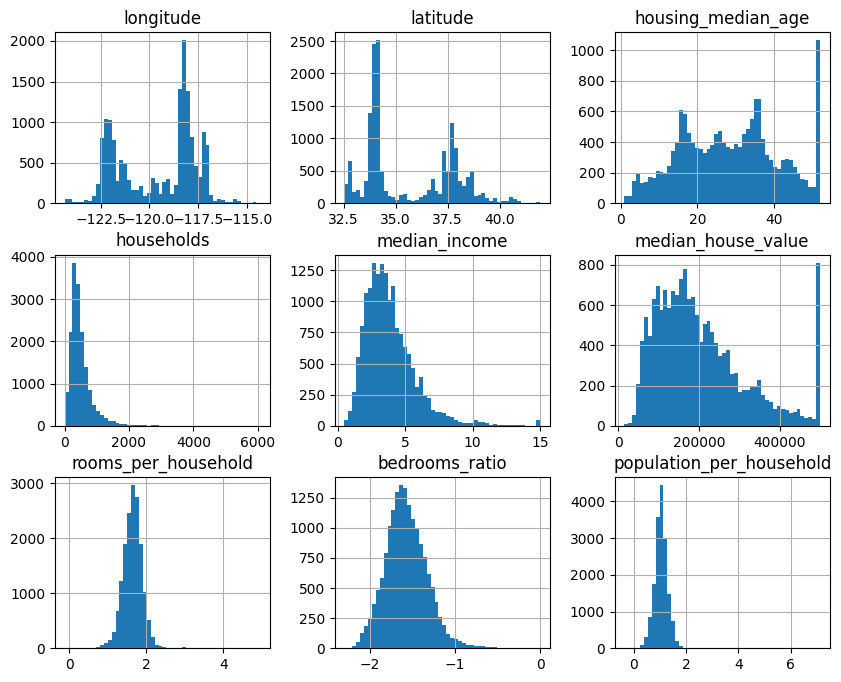

In [ ]:
housingtr.hist(bins=50,figsize=(10,8))

In [ ]:
corr_matrix = housingtr.corr()  # from pandas
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687013
rooms_per_household,0.236074
housing_median_age,0.104714
households,0.065798
longitude,-0.043603
latitude,-0.146324
population_per_household,-0.252223
bedrooms_ratio,-0.324839


bedrooms_ratio attribute is much more correlated with the median house value than the total number of rooms or bedrooms. So this is a useful attribute to keep, though it's missing some data. See Geron on how to try and fill in the missing data ("imputation"). For now we will just drop data without this attribute

In [ ]:
housingtrclean = housingtr.dropna(subset=["bedrooms_ratio"])
housingtrclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16349 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16349 non-null  float64
 1   latitude                  16349 non-null  float64
 2   housing_median_age        16349 non-null  float64
 3   households                16349 non-null  float64
 4   median_income             16349 non-null  float64
 5   median_house_value        16349 non-null  float64
 6   rooms_per_household       16349 non-null  float64
 7   bedrooms_ratio            16349 non-null  float64
 8   population_per_household  16349 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
#3.1. SEPARATE LABELS AND PREDICTORS
housingtrclean_labels = housingtrclean["median_house_value"].copy()
housingtrclean_labels.head()

,median_house_value
14196,291000.0
8267,156100.0
17445,353900.0
14265,241200.0
2271,53800.0


In [ ]:
housingtrclean_predictors = housingtrclean.drop("median_house_value", axis="columns")  # or axis=1
housingtrclean_predictors.head()

,longitude,latitude,housing_median_age,households,median_income,rooms_per_household,bedrooms_ratio,population_per_household
14196,-117.22,32.75,34.0,1072.0,4.5878,1.722400,-1.686666,0.906542
8267,-117.03,32.69,10.0,167.0,4.6648,1.685511,-1.709755,1.430225
17445,-122.27,37.74,28.0,1484.0,3.6875,1.538084,-1.491993,0.695167
14265,-121.82,37.25,25.0,650.0,5.1663,1.822314,-1.847237,1.209190
2271,-115.98,33.32,8.0,24.0,1.4688,2.302585,-1.651998,0.965081


In [ ]:
#3.2. RESCALE
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
housingtrclean_min_max_scaled = min_max_scaler.fit_transform(housingtrclean)

In [ ]:
housingtrclean_min_max_scaled  # gives a numpy array.  scikit-learn works with arrays but can also use pandas DataFrame

array([[0.71015936, 0.02231668, 0.64705882, ..., 0.36274277, 0.26749043,
        0.17005468],
       [0.72908367, 0.01594049, 0.17647059, ..., 0.35547117, 0.25746281,
        0.23994179],
       [0.20717131, 0.55260361, 0.52941176, ..., 0.32640976, 0.35203582,
        0.14184603],
       ...,
       [0.5       , 0.39744952, 0.29411765, ..., 0.34228657, 0.30284678,
        0.14624186],
       [0.71314741, 0.16365569, 0.41176471, ..., 0.34023575, 0.35212383,
        0.20312978],
       [0.54681275, 0.17853348, 0.41176471, ..., 0.38627334, 0.21112488,
        0.21438828]])

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>]], dtype=object)

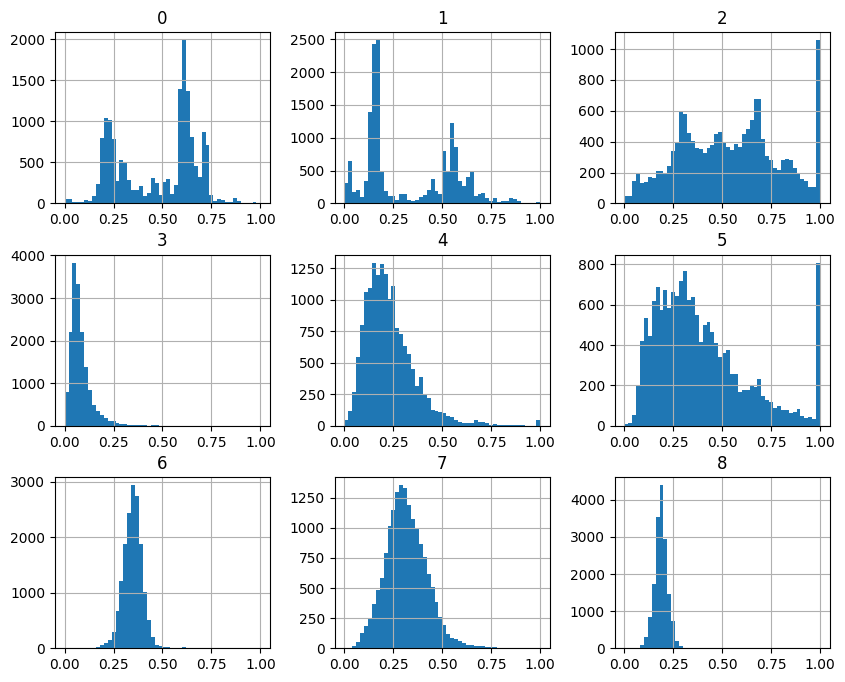

In [ ]:
# convert rescaled array to pandas DataFrame inspect
housingtrclean_min_max_scaled_pd = pd.DataFrame(housingtrclean_min_max_scaled)
housingtrclean_min_max_scaled_pd.hist(bins=50,figsize=(10,8))

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
housingtrclean_standard_scaled = standard_scaler.fit_transform(housingtrclean)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: title={'center': '8'}>]], dtype=object)

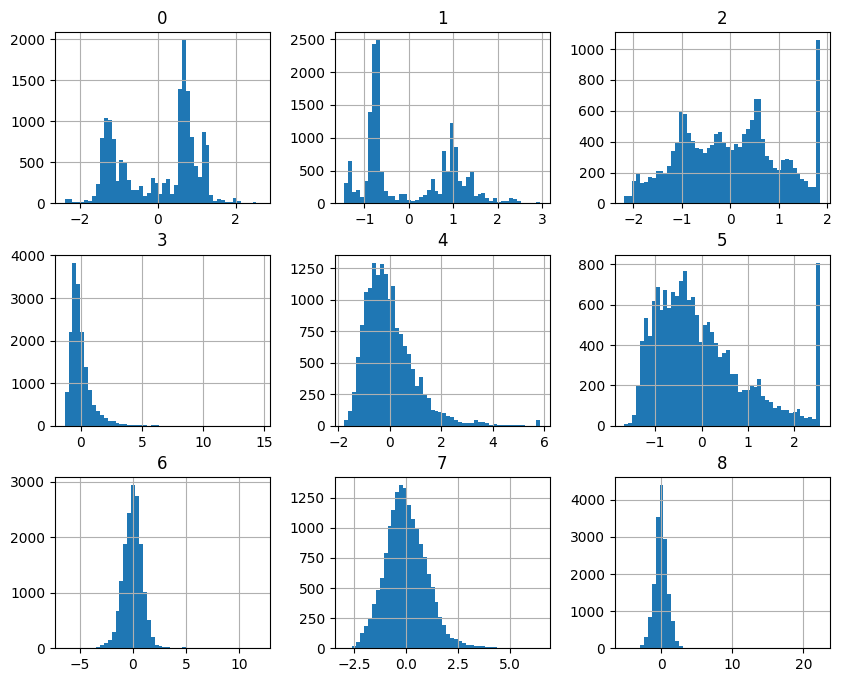

In [ ]:
housingtrclean_standard_scaled_pd = pd.DataFrame(housingtrclean_standard_scaled)
housingtrclean_standard_scaled_pd.hist(bins=50,figsize=(10,8))

In [ ]:
# Better: Use Pipeline of scikit-learn